# Data Preparation
##### Text information:  
Using original csv file and syllables function, create columns for syllables per word, total syllables in phrase, and number of words in phrase
<br>
##### Audio information:
1. set decible level to -20 for consistency
2. strip silence from audio
3. split audio phrase according to percent syllables in word over syllables in phrase
4. lower quality of longer words, so all data points have the same dimensions
5. convert to numpy array using get_array_of_samples from pydub

In [55]:
import pandas as pd
df = pd.read_csv('Data/cv-valid-train.csv')
df = df[['filename','text']]

df.head()



,filename,text
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...


In [56]:
def syllables(phrase):
    sep_words = phrase.split(' ')
    syllables_lst = []
    vowels = 'aieouy'
    doubles = ['ia','eo','ier','iest','eing','io']
    for word in sep_words:
        count = 0
        is_consonant = True
        for letter in word:
            if letter in vowels and is_consonant:
                count +=1
                is_consonant = False
            elif letter not in vowels:
                is_consonant = True
        if len(word)>1 and count>1:
            if word[-1]=='e' and word[-2] not in vowels:
                count -=1
        for pair in doubles: 
            if pair in word: count +=1
        if ('nion' in word) or ('tion' in word) or ('sion' in word):
            count -=1
        if word == 'mr': count = 2 
        if count == 0: count = 1
        syllables_lst.append(count)
    
    return syllables_lst

#### Columns to add:
* num words
* total syllables
* syllables per word

In [3]:
df.shape

(195776, 2)

In [15]:
df['syllables'] = df['text'].apply(syllables)
df.head()

,filename,text,syllables
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,"[1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1]"
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,"[4, 1, 1, 3, 3, 1, 1]"
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2]"
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,"[1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1]"
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,"[1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, ..."


In [16]:
df['word_count'] = df['syllables'].apply(len)
df['total_syllables'] = df['syllables'].apply(sum)
df.head()

,filename,text,syllables,word_count,total_syllables
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,"[1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1]",12,16
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,"[4, 1, 1, 3, 3, 1, 1]",7,14
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2]",14,16
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,"[1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1]",15,18
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,"[1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, ...",17,20


In [17]:
# check for cases with fewer syllables than words, as these are errors
df.loc[df['word_count']>df['total_syllables']]

,filename,text,syllables,word_count,total_syllables


In [18]:
# save processed csv file
df.to_csv('Data/cv_train_processed.csv',index=False)

#### Audio files steps:
1. import files to a list
2. remove silence and break up by syllables
3. frame rate change, convert to np array, set to 12k samples
4. add list of arrays to df (maybe? would def be a better way to save data)

In [1]:
# re-import modified csv, and change syllables column from string to list

import pandas as pd
from ast import literal_eval
df = pd.read_csv('Data/cv_train_processed.csv')
df['syllables'] = df['syllables'].apply(literal_eval)
df.head()

,filename,text,syllables,word_count,total_syllables
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,"[1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1]",12,16
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,"[4, 1, 1, 3, 3, 1, 1]",7,14
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2]",14,16
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,"[1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1]",15,18
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,"[1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, ...",17,20


therefore       18
competition     18
leagues         18
anderson        18
chilling        18
                ..
dipson           1
applications     1
justify          1
rampage          1
doctype          1
Length: 4004, dtype: int64

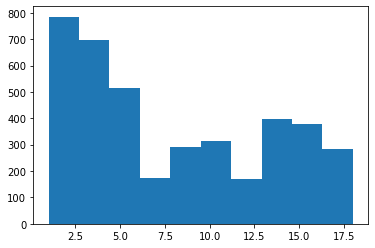

In [3]:
# examine vocabulary and frequency of words

import numpy as np
words_list = np.hstack([x.split(' ') for x in df['text']])
words_list_df = pd.Series(words_list)
temp = words_list_df.value_counts()
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist([x for x in temp[4000:]])
temp[4000:]

In [2]:
from pydub import AudioSegment
from pydub import silence
import numpy as np

#phrase_samples_list = []
#full_len = []
#nonsilent_len = []
words_samples_list = None

for ind in range(10000,15000):
    pathname = 'Data/' + df.iloc[ind]['filename']
    audio_raw = AudioSegment.from_mp3(pathname)
    
    audio = audio_raw.apply_gain(-20 - audio_raw.dBFS)
    #full_len.append(len(audio))
    
    nonsils = silence.detect_nonsilent(audio,min_silence_len=100,silence_thresh=-50)
    nonsilent_lst = []
    
    for pair in nonsils:
        nonsilent_lst.append(audio[pair[0]:pair[1]])
    nonsilent=sum(nonsilent_lst)
    if nonsilent==0:nonsilent=audio
    #nonsilent_len.append(len(nonsilent))

    total_time = len(nonsilent)
    aud_list = []
    current_time = 0
    total_sybs = df.iloc[ind]['total_syllables']
    for word in df.iloc[ind]['syllables']:
        time = total_time*word/total_sybs
        if current_time>25:current_time -=25
        if (current_time+time)<(total_time-25):time+=25
        aud_list.append(nonsilent[current_time:current_time+time])
        current_time +=time
        
    default_rate= 48000

    #words_samples_list = []
    for aud in aud_list:
        change_quality = aud.set_frame_rate(round(default_rate*62.5/len(aud)))
        samples = np.array(change_quality.get_array_of_samples())
        if samples.shape[0]<3000:samples = np.append(samples,[0]*(3000-samples.shape[0]))
        
        samples = samples[:3000]
        if words_samples_list is None: words_samples_list = samples.reshape(1,3000)
        else: words_samples_list = np.append(words_samples_list,samples.reshape(1,3000),axis=0)
        
        
    #phrase_samples_list.append(words_samples_list)
print(words_samples_list.shape)

words_list = np.hstack([x.split(' ') for x in df.iloc[10000:15000]['text']])
words_df = pd.DataFrame(words_samples_list,columns = ['sample_'+str(i) for i in range(3000)])
words_df['words'] = words_list
words_df.head()
print(words_df.shape)

words_df.to_csv('Data/samples_3.csv',index=False)

(46820, 3000)
(46820, 3001)


In [97]:
# sample of how to split csv files into individual words
# this approximates what the data will look like before normalizing and modeling




words_list = np.hstack([x.split(' ') for x in df.iloc[:5000]['text']])
words_df = pd.DataFrame(words_samples_list,columns = ['sample_'+str(i) for i in range(3000)])
words_df['words'] = words_list
words_df.head()

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_2991,sample_2992,sample_2993,sample_2994,sample_2995,sample_2996,sample_2997,sample_2998,sample_2999,words
0,129,206,227,208,275,402,474,559,658,880,...,-6458,-4407,-2736,-1968,0,0,0,0,0,learn
1,-4786,-3695,-694,2025,3114,2906,1890,1563,2868,4372,...,6378,-4740,-14274,-14041,0,0,0,0,0,to
2,8766,2490,-2130,12988,8776,-5231,-2914,-3595,-12298,-7002,...,1671,1726,106,-1328,193,928,1603,1423,1183,recognize
3,718,165,-1624,-1544,1007,620,1096,-1256,-1975,60,...,345,1353,1125,-5120,-5043,-3150,-4747,-5659,-5833,omens
4,320,-109,590,895,389,334,871,948,1581,1838,...,-20211,-20799,-21697,-18167,0,0,0,0,0,and


In [98]:
words_df.shape

(47338, 3001)

In [100]:
words_df.to_csv('Data/samples_1.csv',index=False)

In [74]:
# sample of processed data

mini_df = df.iloc[:500]
mini_df['samples'] = phrase_samples_list
mini_df['total_time'] = full_len
mini_df['nonsilent_time'] = nonsilent_len
mini_df.head()

D:\Alex\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Alex\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Alex\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,filename,text,syllables,word_count,total_syllables,samples,total_time,nonsilent_time
0,cv-valid-train/sample-000000.mp3,learn to recognize omens and follow them the o...,"[1, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1]",12,16,"[[129, 136, 140, 161, 192, 215, 221, 222, 226,...",4104,3386
1,cv-valid-train/sample-000001.mp3,everything in the universe evolved he said,"[4, 1, 1, 3, 3, 1, 1]",7,14,"[[-574, -574, -613, -665, -815, -779, -803, -7...",7560,2655
2,cv-valid-train/sample-000002.mp3,you came so that you could learn about your dr...,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2]",14,16,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",5064,4102
3,cv-valid-train/sample-000003.mp3,so now i fear nothing because it was those ome...,"[1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1]",15,18,"[[-53, 5, 71, 115, 100, 42, 1, 14, 69, 120, 13...",6648,4280
4,cv-valid-train/sample-000004.mp3,if you start your emails with greetings let me...,"[1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, ...",17,20,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",4896,4896
